# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import Nltk package

In [2]:
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # progressbar tracker  when do some loops on the data

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tmost\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tmost\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tmost\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\tmost\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\tmost\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tmost\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tmost\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Load DataSet

In [4]:
df = pd.read_csv('C:/Users/tmost/Documents/Data-course/NLP_SemanticAnalysis/Reviews.csv')
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


# Downsample Dataset 

- To ease up our analysis and modeling process and speed up computation time, let’s extract sample data from our dataset.

In [6]:
# Downsample Dataset to analyze faster

#df = df.sample(frac = 0.01, replace = False, random_state=42)
df = df.head(500)
df.shape

(500, 10)

# EDA

In [7]:
df['Summary'][5]

'Nice Taffy'

In [8]:
df['Score'].value_counts(normalize=True)

5    0.678
4    0.140
3    0.074
1    0.072
2    0.036
Name: Score, dtype: float64

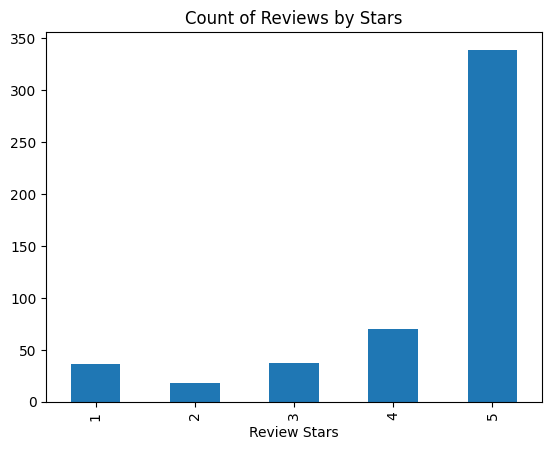

In [9]:
# Count of Reviews by stars

ax = df.Score.value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars')

ax.set_xlabel('Review Stars')
plt.show()

# Basic NLTK

In [10]:
example = df['Text'][5]
print(example)

I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.


- what nltk can do?
- nltk can tokenize this sentences

In [11]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'got', 'a', 'wild', 'hair', 'for', 'taffy', 'and', 'ordered', 'this']

In [12]:
tokens1 =nltk.sent_tokenize(example)

In [13]:
tokens1

['I got a wild hair for taffy and ordered this five pound bag.',
 'The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc.',
 'My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites).',
 'Between me, my kids, and my husband, this lasted only two weeks!',
 'I would recommend this brand of taffy -- it was a delightful treat.']

In [14]:
# part-of-speech tagging using the nltk.pos_tag() function.
#https://pythonexamples.org/nltk-pos-tagging/

tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('got', 'VBD'),
 ('a', 'DT'),
 ('wild', 'JJ'),
 ('hair', 'NN'),
 ('for', 'IN'),
 ('taffy', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('this', 'DT')]

In [15]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  got/VBD
  a/DT
  wild/JJ
  hair/NN
  for/IN
  taffy/NN
  and/CC
  ordered/VBD
  this/DT
  five/CD
  pound/NN
  bag/NN
  ./.
  The/DT
  taffy/NN
  was/VBD
  all/DT
  very/RB
  enjoyable/JJ
  with/IN
  many/JJ
  flavors/NNS
  :/:
  watermelon/NN
  ,/,
  root/NN
  beer/NN
  ,/,
  melon/NN
  ,/,
  peppermint/NN
  ,/,
  grape/NN
  ,/,
  etc/FW
  ./.
  My/PRP$
  only/JJ
  complaint/NN
  is/VBZ
  there/EX
  was/VBD
  a/DT
  bit/NN
  too/RB
  much/JJ
  red/black/NN
  licorice-flavored/JJ
  pieces/NNS
  (/(
  just/RB
  not/RB
  my/PRP$
  particular/JJ
  favorites/NNS
  )/)
  ./.
  Between/IN
  me/PRP
  ,/,
  my/PRP$
  kids/NNS
  ,/,
  and/CC
  my/PRP$
  husband/NN
  ,/,
  this/DT
  lasted/VBN
  only/RB
  two/CD
  weeks/NNS
  !/.
  I/PRP
  would/MD
  recommend/VB
  this/DT
  brand/NN
  of/IN
  taffy/NN
  --/:
  it/PRP
  was/VBD
  a/DT
  delightful/JJ
  treat/NN
  ./.)


# step 1. VADER Sentiment Scoring

- VADER = (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach


- We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.


**This uses a "bag of words" approach:**

- Stop words are removed

- Each word is scored and combined to a total score.

- take all the words in a sentence, and it has a value for whether positive, negative, or neutral for each word and combines them just like a math equation and tells how pos, neg, neut that statement


- Score Each word Individually


- this approach does not account for the relationship between words, which in human speech is very important, but at least it's a good start.


- remove the stop words (no meaning; it's just for the structure of the sentences)

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # progressbar tracker  when do some loops on the data

In [17]:
# sentiment anlyzer object
sia = SentimentIntensityAnalyzer()

In [18]:
sia.polarity_scores('I am so excited!')  #compound is the average from negative one to positive one 

{'neg': 0.0, 'neu': 0.401, 'pos': 0.599, 'compound': 0.4561}

In [19]:
sia.polarity_scores('I have stress') # compound is more on negative side than positive

{'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'compound': -0.4215}

In [20]:
sia.polarity_scores(example)

{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

# Run the polarity score on the entire dataset

In [21]:
res = {} # dic for store the results of the sentiment analysis for each row.

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [22]:
# Convert dictionary to dataframe

pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [23]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df,how='left')

# Now we have sentiment score and metadata

In [24]:
vaders.head(3)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


# Plot VADER results


- Hypothesis: 5 star review is correlated with positive text score

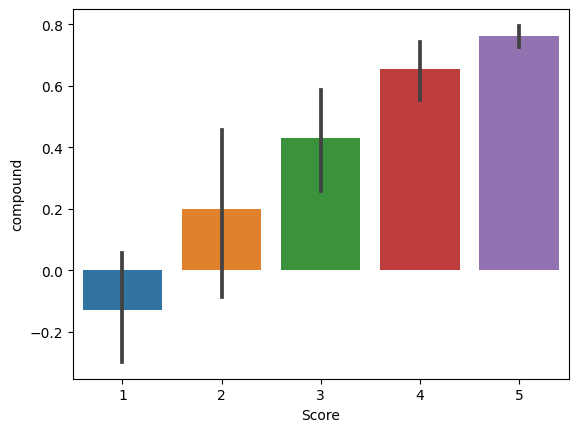

In [25]:
sns.barplot(data=vaders, x='Score',y='compound')
ax.set_title('Compund core by Amazon Star Review')
plt.show()

**Observation**

- One star review has lower compund Score and Five star review has a higher compound

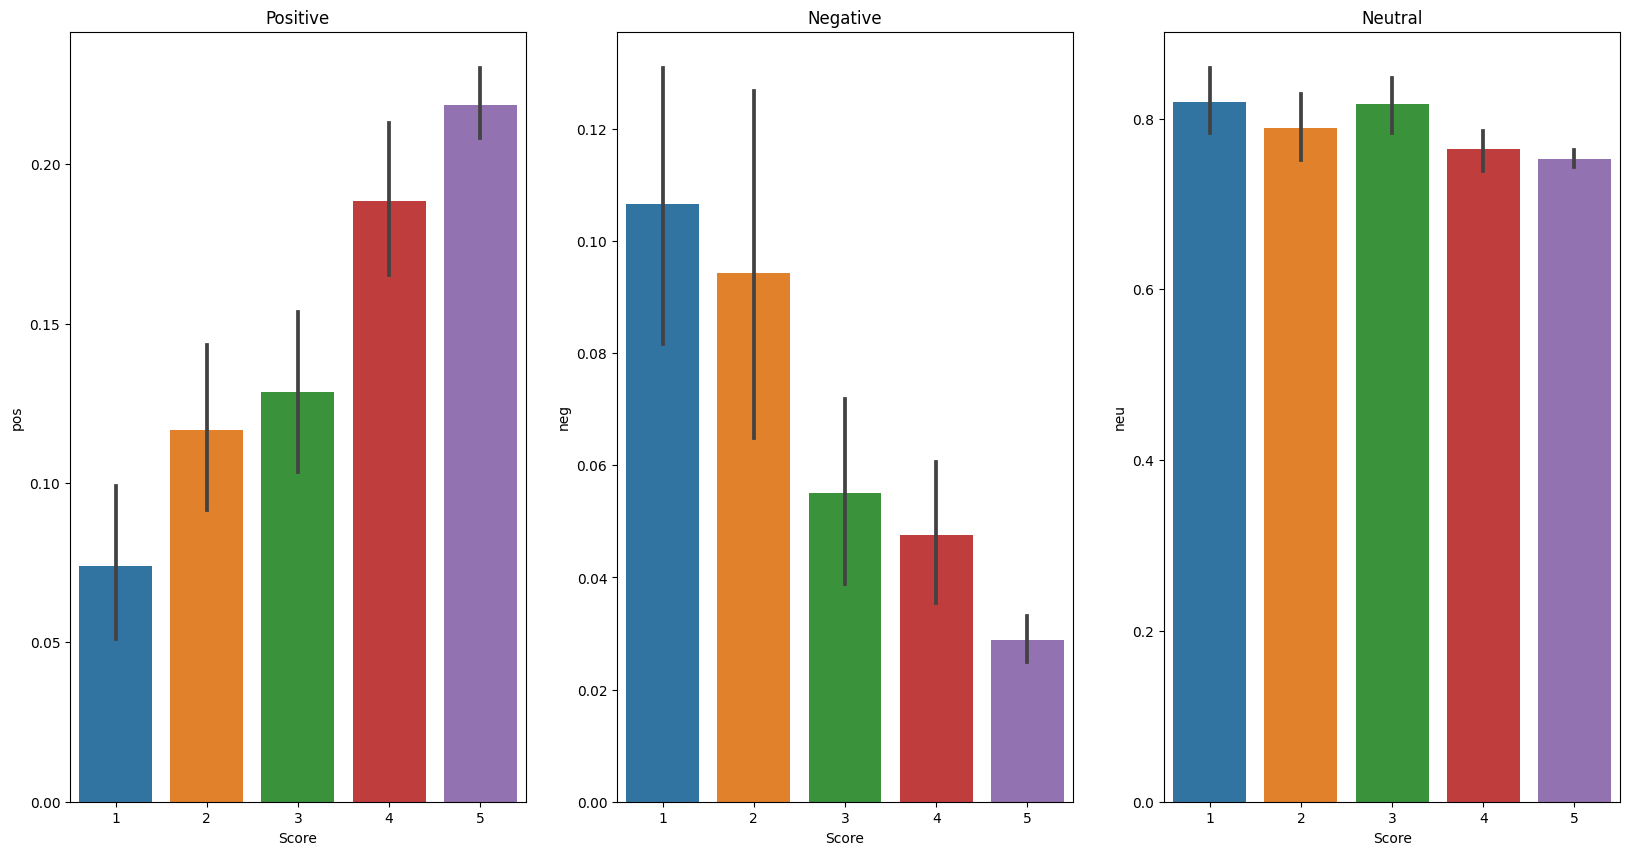

In [26]:
fig, axs = plt.subplots(1,3,figsize=(20,10))
sns.barplot(data=vaders, x='Score',y='pos',ax = axs[0])
sns.barplot(data=vaders, x='Score',y='neg',ax = axs[1])
sns.barplot(data=vaders, x='Score',y='neu',ax = axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')

plt.show()

**Observation**

- Positivity is higher as the score is higher 


- Negativity is higher as the score lower, goes down it b


- Being Neutral has consistent score, kind of flat


- So sofar we see what expected but these VADER model can not capture the context and relationship between words

# Hugging face :)


- Focus on Modern Deep leraning models, provide pretrained models tokenization utilities, to simplify the process of building, and deploying NLP models.


- key offering by Hugging Face is the Transformers library, which allow user to easily work with NLP task

In [27]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax

In [28]:
# use pretrained model which provided by hugging face, run auto tokenizer and sequence classification methods
# Here download the weights

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


- Here I used Autotokenizer and Auto model sequence classification methods, and load it from a pre_trained model 


- It will pull down the model weights that have been stored 


- Doing Transfer learning this model train on bunch of twitter comments that were labeled


- So we don't need to retain the model, we can use these train weights and apply to our data set


- Now we have the model and the tokenizer that can apply to the text

In [29]:
# Vader Results on example

print(example)
sia.polarity_scores(example)

I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.


{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [30]:
# Run for Roberta Model

encoded_text = tokenizer(example, return_tensors = 'tf') # returns a dict of tokenized inputs # returned as TensorFlow tensors
output = model(**encoded_text) 
scores = output[0][0].numpy()
scores = softmax(scores)
scores_dict = {'Roberta_neg' : scores[0],
              'Roberta_neu' : scores[1],
              'Roberta_pos' : scores[2]}

In [31]:
scores_dict

{'Roberta_neg': 0.006129584,
 'Roberta_neu': 0.021795815,
 'Roberta_pos': 0.97207457}

**Observation**

- The Roberta model ('Roberta_neg') is higher (0.48554903) compared to the negative sentiment value in the Vader model ('neg') (0.104).

In [32]:
def polarity_scores_roberta(example):
    
    encoded_text = tokenizer(example, return_tensors = 'tf') 
    output = model(**encoded_text)
    scores = output[0][0].numpy()
    scores = softmax(scores)
    scores_dict = {'roberta_neg' : scores[0],
                  'roberta_neu' : scores[1],
                  'roberta_pos' : scores[2]}
    return scores_dict

# Run VADER + Roberta, then combine results in dictionary

In [33]:
df = df.drop(df[df['Id'] == 514].index)

In [34]:
max_length = 512  # Maximum length for the text

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text'][:max_length]  # Truncate the text to the maximum length
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}  # Combine two dictionaries
        res[myid] = both
    except RuntimeError:
         print(f'Broke for id {myid}')


  0%|          | 0/500 [00:00<?, ?it/s]

In [38]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [39]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940396,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Compare Score between models

In [40]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

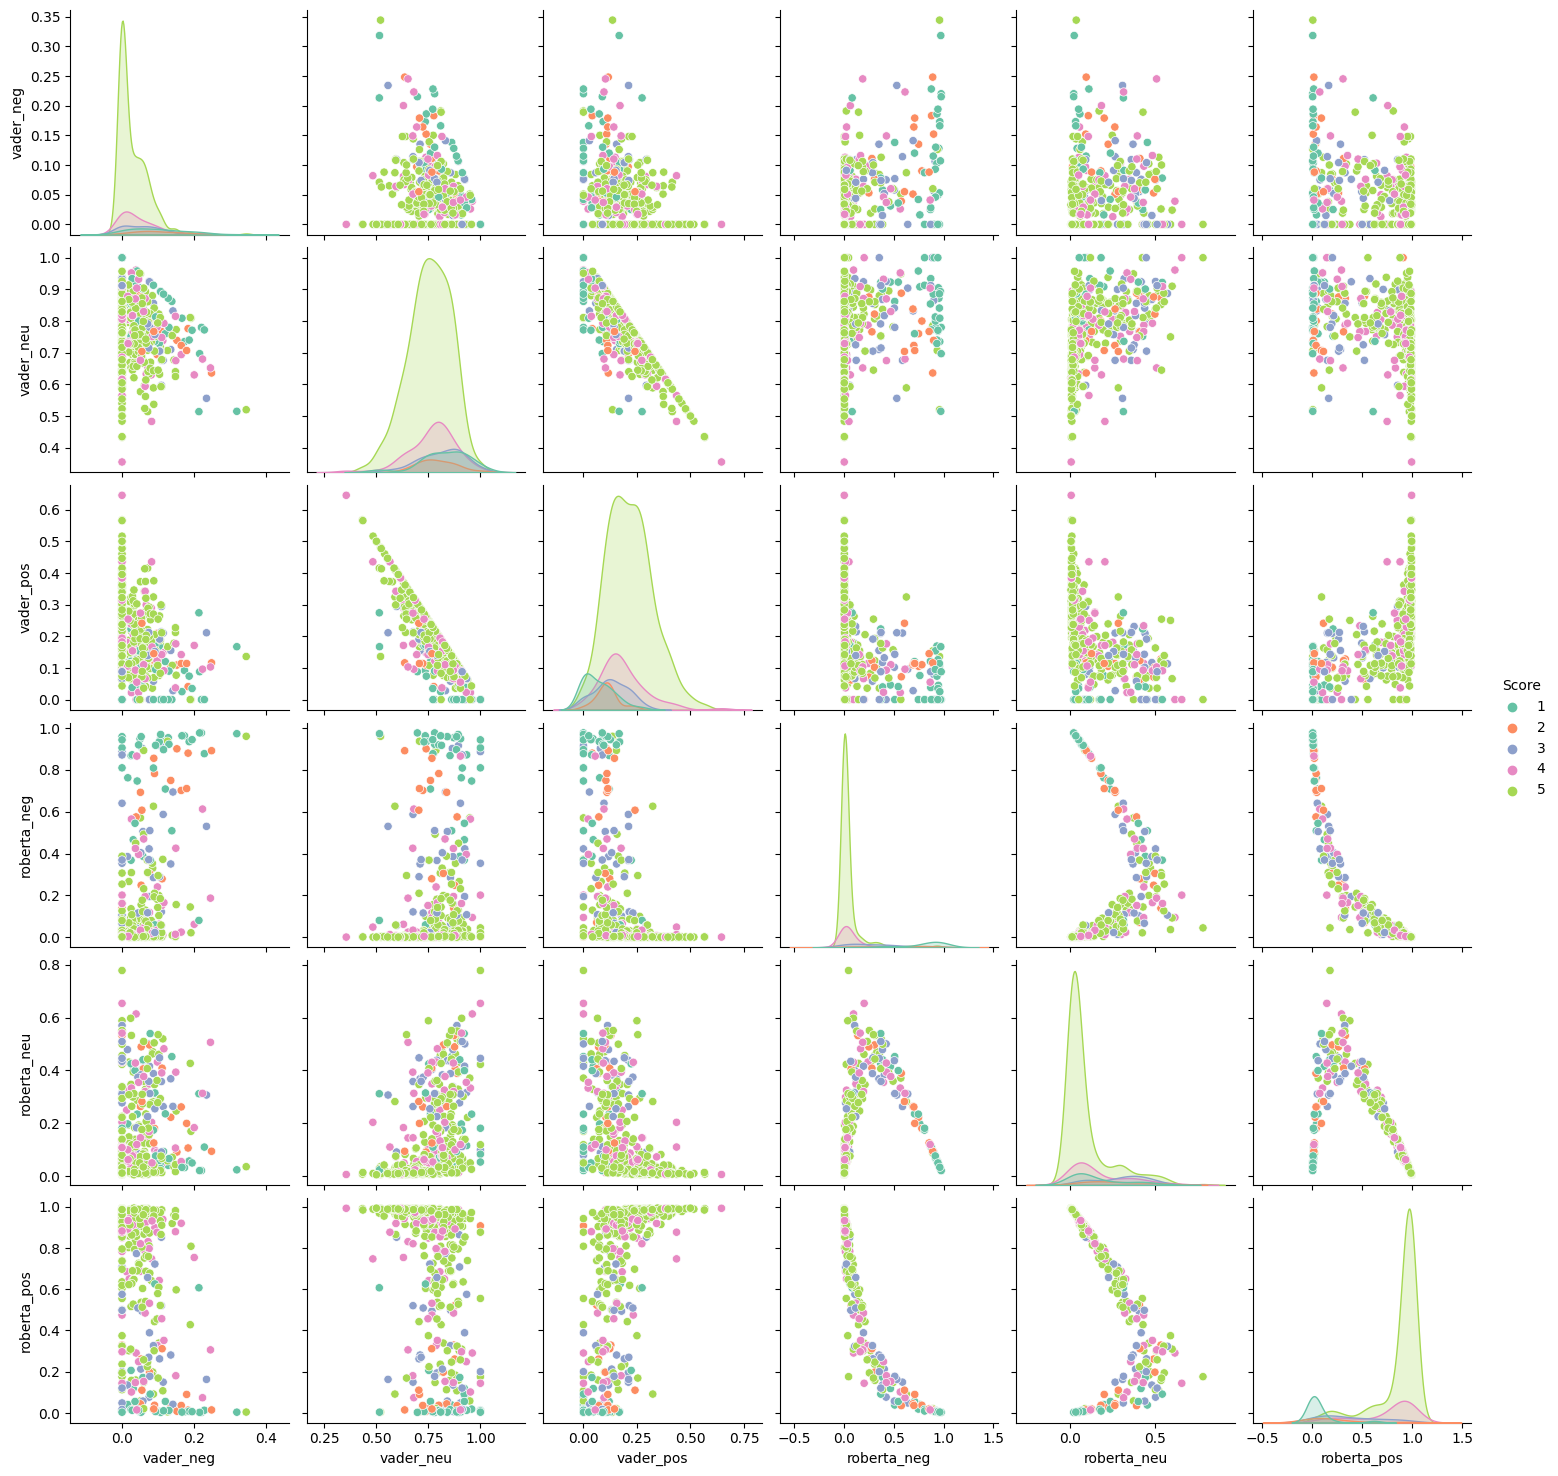

In [45]:
sns.pairplot(data=results_df, 
            vars = ['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], hue= 'Score',
            palette= 'Set2')

plt.show()

**Observation**

- The VADER sentiment analysis model demonstrates a positive bias, particularly towards 5-star reviews. This indicates that the VADER model tends to classify reviews as more positive, even when compared to the Roberta model, which also exhibits a strong positive bias towards 5-star reviews.


- Furthermore, there appears to be some level of correlation between the predictions of the VADER and Roberta models. However, accurately determining the extent of this correlation is challenging when relying solely on visual inspection of the pairplot.


- It is worth noting that the VADER model demonstrates lower confidence levels in its predictions compared to the Roberta model. This suggests that the VADER model is less certain in its classifications across the board when compared to the more confident predictions made by the Roberta model.


- Overall, these findings shed light on the performance and characteristics of the VADER and Roberta models in analyzing sentiment, highlighting their biases, correlation, and confidence levels.